<a href="https://colab.research.google.com/github/jakeh46g/Naive-Bayes-Classification/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import packages and functions
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

data = pd.read_csv('cellphonechurn.csv')
data


,Customer,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1,0,164,1,1,3.86,1,219.1,88,89.6,7.58,14.3
1,2,1,177,0,0,0.00,1,248.7,118,57.0,8.62,11.3
2,3,0,132,1,0,0.31,1,191.9,107,54.1,10.35,12.6
3,4,1,70,1,0,0.00,0,232.8,95,66.0,15.17,12.9
4,5,0,81,1,1,3.29,1,161.6,117,70.9,6.15,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2146,2147,0,201,1,0,0.24,1,212.7,72,58.4,11.26,7.0
2147,2148,1,108,0,0,0.38,2,115.1,114,41.8,10.57,13.8
2148,2149,0,70,1,0,0.31,0,177.4,125,53.1,11.31,10.9
2149,2150,0,62,1,0,0.00,4,245.3,91,53.0,6.15,8.5


In [ ]:
features = ['DataUsage','DayMins','DayCalls']
X = data[features]
y = data[['Churn']]

# Create a training/testing split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=8675309)


In [ ]:
model = GaussianNB()

In [ ]:
# Train the Naive Bayes and SVM models using the training data

model.fit(X_train, y_train);

y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Predict the response for test dataset
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

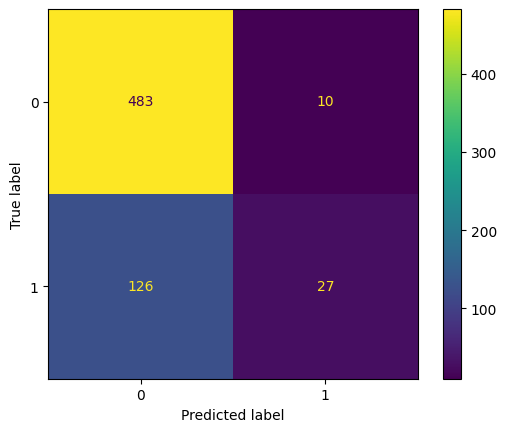

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [ ]:
# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f'AUC score: {auc_score:.2f}')



AUC score: 0.62


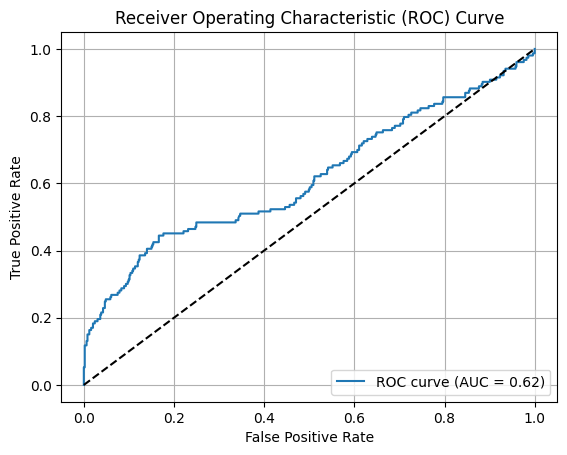

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# Load new data for prediction
new_data_file = "unknown_churn_data.csv"
new_data = pd.read_csv(new_data_file)

new_data


,Customer,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,2152,90,1,0,0.28,2,114.4,122,33.8,6.39,10.1
1,2153,103,1,1,3.92,2,185.4,105,88.2,9.88,14.5
2,2154,35,1,1,2.54,1,241.7,87,79.4,7.10,9.4
3,2155,90,1,1,1.73,1,124.5,94,58.3,11.59,6.4
4,2156,161,1,0,0.00,2,322.3,100,75.0,11.52,7.8
5,2157,72,1,0,0.42,3,118.2,106,39.2,8.36,12.2
6,2158,125,1,0,0.30,2,169.3,90,46.0,7.80,11.6
7,2159,93,1,1,3.05,7,152.3,90,79.5,13.38,11.3
8,2160,23,1,0,0.00,2,321.6,107,77.0,12.58,11.3
9,2161,52,1,1,3.65,1,133.3,63,75.5,9.21,13.5


In [ ]:

# Predict Y values for the new data

features = ['DataUsage','DayMins','DayCalls']

new_X = new_data[features]
new_data["Predicted_Time"] = model.predict(new_X)

In [ ]:
# Print the predictions to the screen
print("Predictions for new assignments:")
print(new_data)

Predictions for new assignments:
   Customer  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0      2152            90                1         0       0.28   
1      2153           103                1         1       3.92   
2      2154            35                1         1       2.54   
3      2155            90                1         1       1.73   
4      2156           161                1         0       0.00   
5      2157            72                1         0       0.42   
6      2158           125                1         0       0.30   
7      2159            93                1         1       3.05   
8      2160            23                1         0       0.00   
9      2161            52                1         1       3.65   

   CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  \
0              2    114.4       122           33.8        6.39      10.1   
1              2    185.4       105           88.2        9.88      14.5   
2